<a href="https://colab.research.google.com/github/22Ifeoma22/22Ifeoma22/blob/main/06_SimpleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

In [25]:
W_true = 2
b_true = 0.5

In [26]:
x = np.linspace(0, 3, 130)

y = W_true * x + b_true + np.random.randn(*x.shape) * 0.5

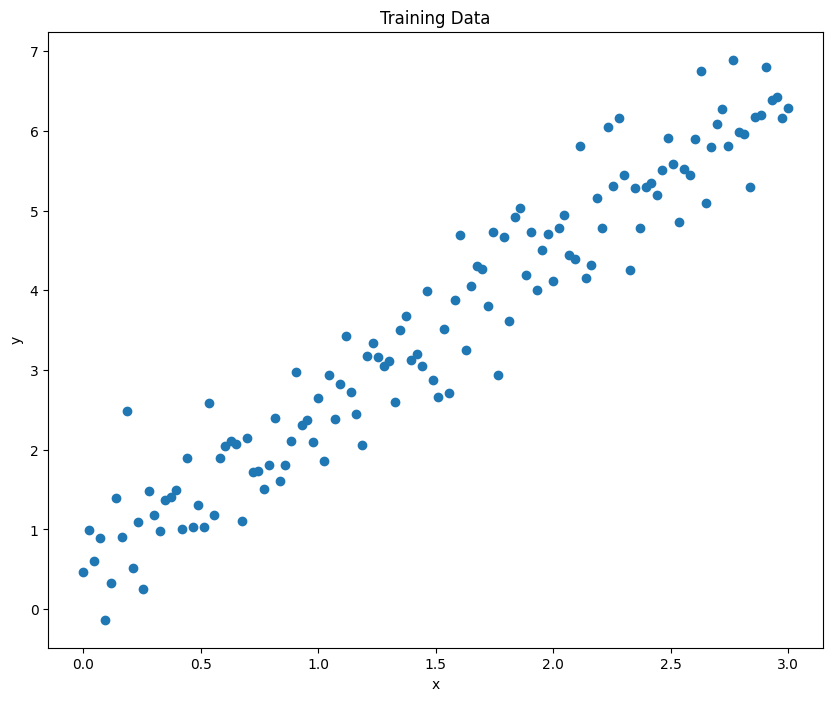

In [27]:
plt.figure(figsize=(10, 8))

plt.scatter(x, y)

plt.xlabel('x')
plt.ylabel('y')

plt.title("Training Data")
plt.show()

Defining the model

In [29]:
class LinearModel:

    def __init__(self):
        self.weight = tf.Variable(np.random.randn(), name = "W")
        self.bias = tf.Variable(np.random.randn(), name = "b")

    def __call__(self, x):
        return self.weight * x + self.bias

Defining the loss function

In [30]:
def loss(y, y_pred):
    return tf.reduce_mean(tf.square(y - y_pred))

Training function

In [31]:
def train(linear_model, x, y, lr = 0.01):

    with tf.GradientTape() as tape:

        y_pred = linear_model(x)

        current_loss = loss(y, y_pred)

    d_weight, d_bias = tape.gradient(current_loss,
                                     [linear_model.weight, linear_model.bias])

    linear_model.weight.assign_sub(lr * d_weight)
    linear_model.bias.assign_sub(lr * d_bias)

### Note:
    First give epochs = 10, show the graph, then epochs = 50 and epochs = 100 show the graph each time

In [42]:
linear_model = LinearModel()

weights, biases = [], []

epochs = 50

lr = 0.15

In [43]:
for epoch_count in range(epochs):

    weights.append(linear_model.weight.numpy())
    biases.append(linear_model.bias.numpy())

    real_loss = loss(y, linear_model(x))

    train(linear_model, x, y, lr = 0.12)

    print(f"Epoch count {epoch_count}: Loss value: {real_loss.numpy()}")

Epoch count 0: Loss value: 11.648587226867676
Epoch count 1: Loss value: 0.4353325664997101
Epoch count 2: Loss value: 0.34331291913986206
Epoch count 3: Loss value: 0.33295339345932007
Epoch count 4: Loss value: 0.3240933418273926
Epoch count 5: Loss value: 0.31606659293174744
Epoch count 6: Loss value: 0.30879122018814087
Epoch count 7: Loss value: 0.3021968603134155
Epoch count 8: Loss value: 0.2962198257446289
Epoch count 9: Loss value: 0.2908022403717041
Epoch count 10: Loss value: 0.2858918011188507
Epoch count 11: Loss value: 0.28144097328186035
Epoch count 12: Loss value: 0.27740684151649475
Epoch count 13: Loss value: 0.27375027537345886
Epoch count 14: Loss value: 0.27043604850769043
Epoch count 15: Loss value: 0.2674320340156555
Epoch count 16: Loss value: 0.2647092342376709
Epoch count 17: Loss value: 0.26224130392074585
Epoch count 18: Loss value: 0.26000434160232544
Epoch count 19: Loss value: 0.25797683000564575
Epoch count 20: Loss value: 0.2561390995979309
Epoch count 

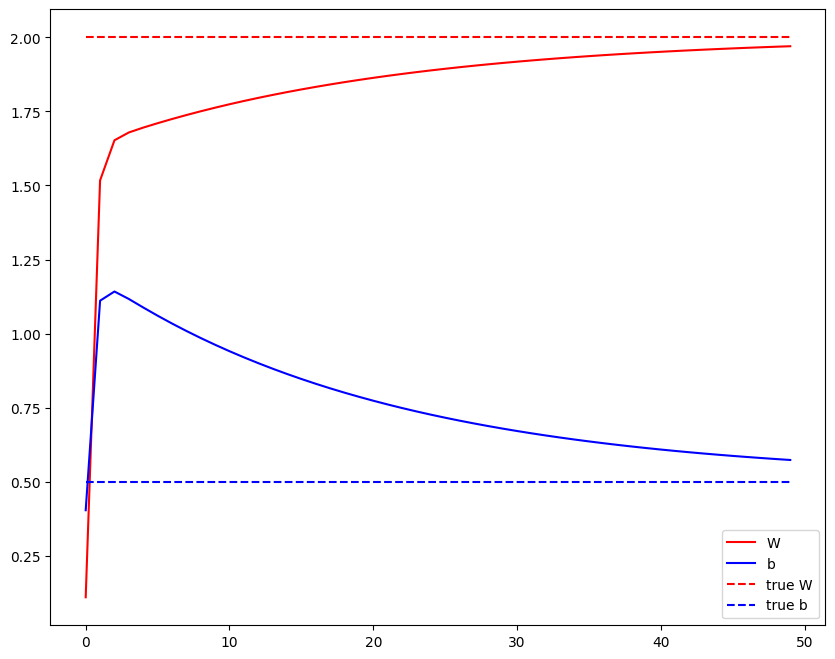

In [44]:
plt.figure(figsize=(10, 8))

plt.plot(range(epochs), weights, 'r', range(epochs), biases, 'b')
plt.plot([W_true] * epochs, 'r--', [b_true] * epochs, 'b--')

plt.legend(['W', 'b', 'true W', 'true b'])
plt.show()

In [45]:
linear_model.weight.numpy(), linear_model.bias.numpy()

(1.9714266, 0.57054454)

In [46]:
rmse = loss(y, linear_model(x))

rmse.numpy()

0.2392773

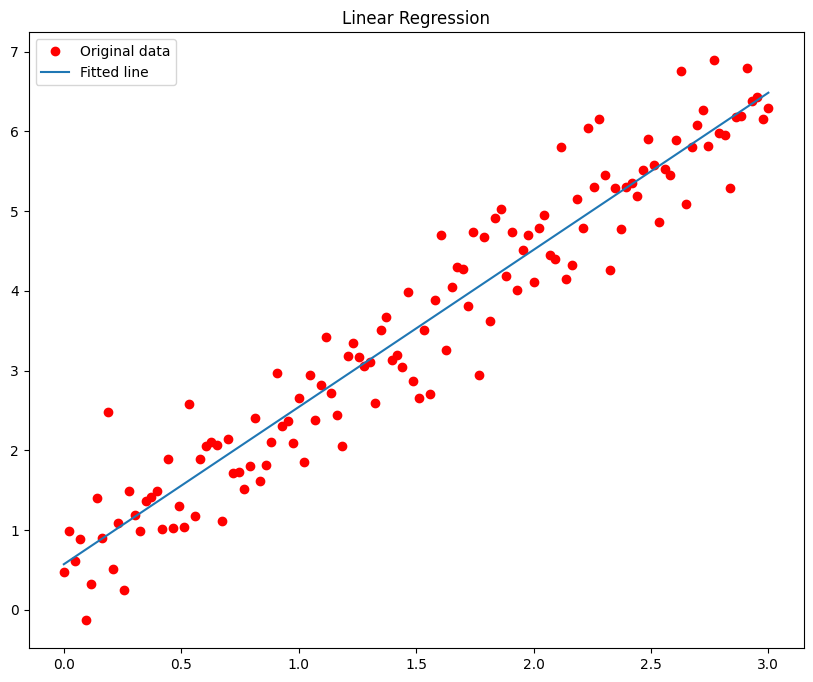

In [47]:
plt.figure(figsize=(10, 8))

plt.plot(x, y, 'ro', label = 'Original data')
plt.plot(x, linear_model(x), label = 'Fitted line')

plt.title('Linear Regression')

plt.legend()
plt.show()

### Using model.fit()

In [48]:
from tensorflow import keras
from tensorflow.keras import layers

In [49]:
x.shape, y.shape

((130,), (130,))

In [50]:
x = pd.DataFrame(x, columns = ['x'])
y = pd.DataFrame(y, columns = ['y'])

In [51]:
x.head()

,x
0,0.000000
1,0.023256
2,0.046512
3,0.069767
4,0.093023


In [52]:
y.head()

,y
0,0.468874
1,0.989133
2,0.606215
3,0.892923
4,-0.132345


In [53]:
x.shape, y.shape

((130, 1), (130, 1))

In [54]:
model = keras.Sequential([layers.Dense(1, input_shape = (1,), activation = 'linear')])

optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001)

model.compile(loss = 'mse', metrics = ['mse'], optimizer = optimizer)

In [55]:
model.fit(x, y, epochs = 100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 5.4809 - mse: 5.4809
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 5.1515 - mse: 5.1515
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 4.8398 - mse: 4.8398
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 4.4667 - mse: 4.4667
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 4.0999 - mse: 4.0999
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 3.8122 - mse: 3.8122
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 3.5472 - mse: 3.5472
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 3.3014 - mse: 3.3014
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 3.0714 - mse: 3.0714
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 2.8155 - mse: 2.8155
Epoch 11/100
5/5 [==============================] - 0s 3ms/step - loss: 2.6033 

In [56]:
y_pred = model.predict(x)

5/5 [==============================] - 0s 3ms/step


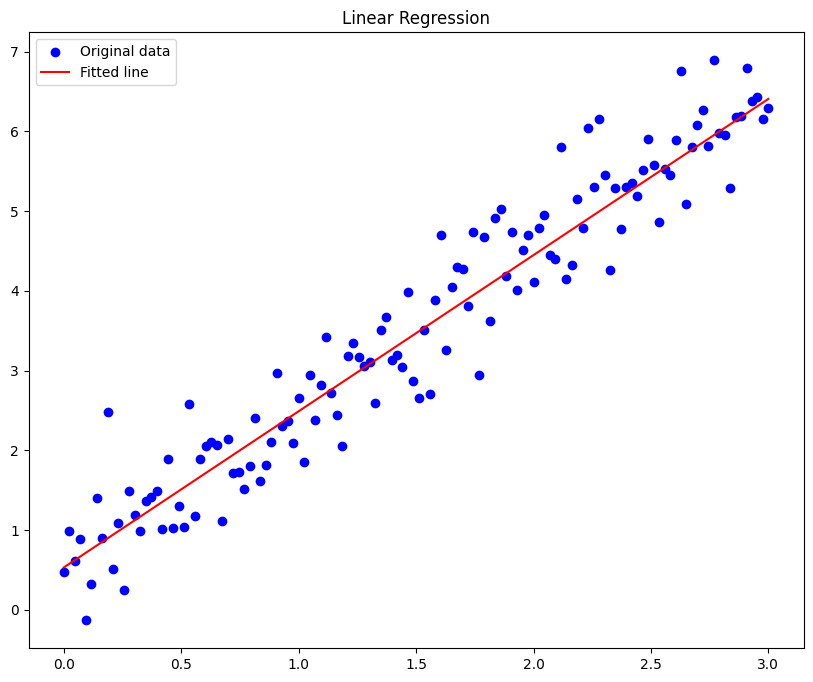

In [58]:
plt.figure(figsize=(10, 8))

plt.scatter(x, y, c = 'blue', label = 'Original data')
plt.plot(x, y_pred, color = 'r', label = 'Fitted line')

plt.title('Linear Regression')
plt.legend()
plt.show()